In [ ]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')


In [ ]:
!unzip "/content/drive/MyDrive/train_nLPp5K8 (1).zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         
  inflating: images/5274.jpg         

In [ ]:
import keras

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
import cv2

In [ ]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [ ]:
data.sample(5)

,image_names,class
4721,7692.jpg,1
11962,23453.jpg,0
7643,5832.jpg,0
2537,5691.jpg,1
3473,14279.jpg,0


In [ ]:
data['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [ ]:
data['class'] = data['class'].astype(str)

In [ ]:
data['image_names'] = 'images/' + data['image_names']

In [ ]:
data.head(3)

,image_names,class
0,images/11413.jpg,1
1,images/9863.jpg,1
2,images/997.jpg,0


In [ ]:
y=data['class']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split = 0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=data,
    x_col='image_names',
    y_col='class',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='training',
    seed = 123
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=data,
    x_col='image_names',
    y_col='class',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle = False,
    seed = 123
)

Found 9757 validated image filenames belonging to 2 classes.
Found 2439 validated image filenames belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

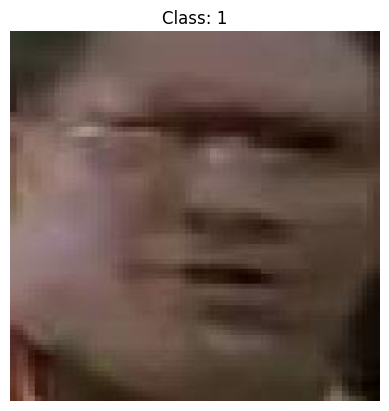

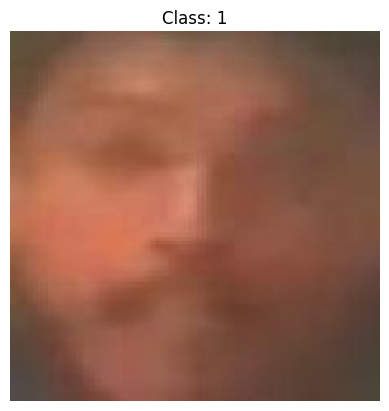

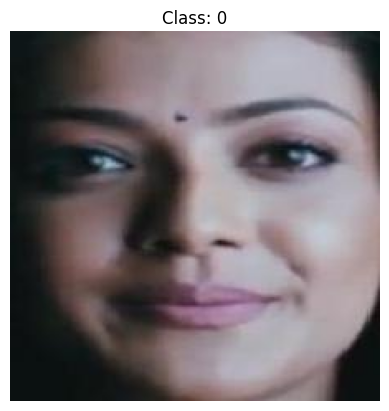

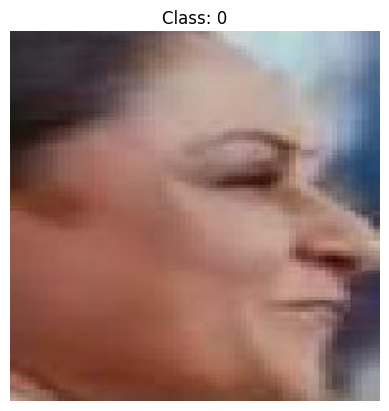

In [ ]:
for index, row in data[:4].iterrows():
    image_name = row['image_names']  # Extract the image name from the 'images' column
    label = row['class']       # Extract the class label from the 'class' column

    # Load the image using PIL
    img = Image.open('/content/' + image_name)

    # Display the image with its label
    plt.imshow(img)
    plt.title(f'Class: {label}')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/test_fkwGUNG (1).csv")

In [ ]:
df.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [ ]:
from keras.src.layers.normalization.batch_normalization_v1 import BatchNormalization
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks = callback
)

Epoch 1/30
304/304 [==============================] - 27s 48ms/step - loss: 0.5531 - accuracy: 0.7372 - val_loss: 0.5067 - val_accuracy: 0.7447
Epoch 2/30
304/304 [==============================] - 14s 45ms/step - loss: 0.4489 - accuracy: 0.8015 - val_loss: 0.5970 - val_accuracy: 0.7249
Epoch 3/30
304/304 [==============================] - 13s 43ms/step - loss: 0.4281 - accuracy: 0.8109 - val_loss: 0.4793 - val_accuracy: 0.7697
Epoch 4/30
304/304 [==============================] - 13s 44ms/step - loss: 0.4070 - accuracy: 0.8202 - val_loss: 0.4003 - val_accuracy: 0.8195
Epoch 5/30
304/304 [==============================] - 18s 57ms/step - loss: 0.3907 - accuracy: 0.8259 - val_loss: 0.4566 - val_accuracy: 0.7907
Epoch 6/30
304/304 [==============================] - 16s 54ms/step - loss: 0.3804 - accuracy: 0.8354 - val_loss: 0.4145 - val_accuracy: 0.8125
Epoch 7/30
304/304 [==============================] - 14s 46ms/step - loss: 0.3537 - accuracy: 0.8454 - val_loss: 0.4147 - val_accuracy:

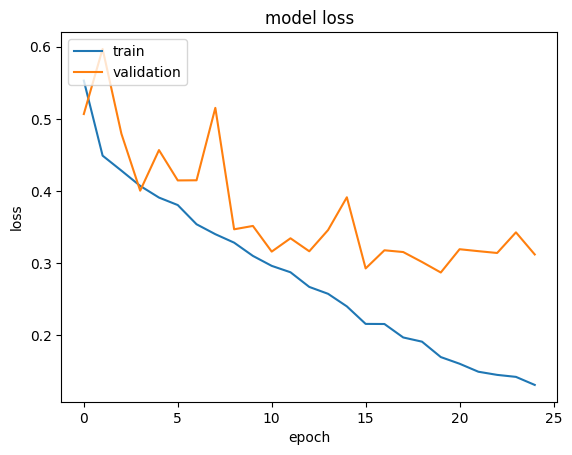

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

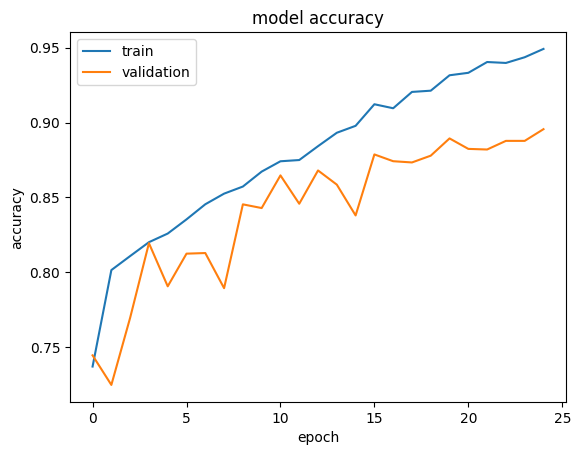

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_test = validation_generator.classes

In [ ]:
# Predict the validation targets using the trained model
validation_generator.reset()
y_pred = model.predict(validation_generator)

77/77 [==============================] - 2s 31ms/step


In [ ]:
#y_pred

array([[0.8785048 ],
       [0.9705968 ],
       [0.00999284],
       ...,
       [0.04741764],
       [0.9903206 ],
       [0.00164634]], dtype=float32)

In [ ]:
threshold = 0.5
y_pred_binary = [1 if val >= threshold else 0 for val in y_pred]

In [ ]:
#y_pred_binary

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1054  148]
 [ 122 1115]]


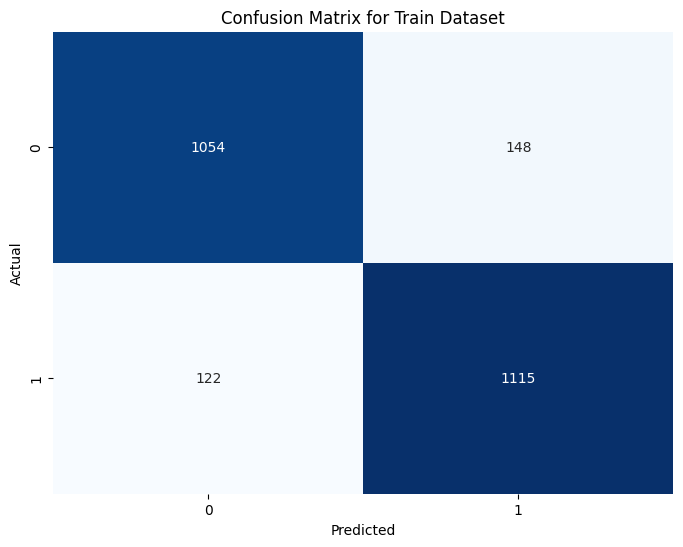

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Train Dataset')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8892988929889298


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_binary)
print(f"F1-Score: {f1}")

F1-Score: 0.8920000000000001


In [ ]:
_, valid_images, _, valid_y =train_test_split(data.image_names.values, y, test_size=0.2, random_state=seed)

Model is 0 % sure that it is male


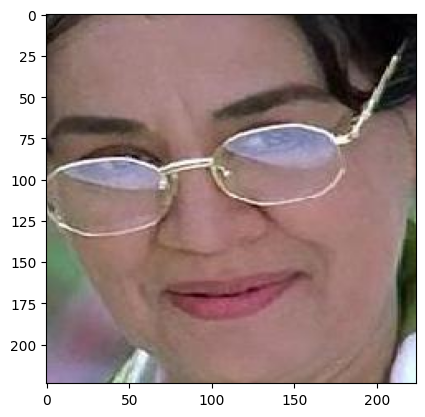

In [ ]:
index = rng.choice(range(len(valid_images)))
img_name = valid_images[index]
prob = int((y_pred * 100).astype(int)[index])
img = plt.imread( img_name)

print('Model is', prob ,'% sure that it is male')
#print('Model is', 100-prob , '% sure that it is female')

plt.imshow(img)

##PRETRAINED MODEL (INCEPTIONRESNETV2)

In [ ]:
inception_base_model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

In [ ]:
model1 = Sequential()

model1.add(inception_base_model)
model1.add(layers.GlobalAveragePooling2D())

model1.add(layers.Dense(64,activation='relu'))
model1.add(layers.Dropout(0.4))

model1.add(layers.Dense(32,activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
inception_base_model.trainable = False

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_20 (Dense)            (None, 64)                98368     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dropout_14 (Dropout)        (None, 32)               

In [ ]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_inc = model1.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks = callback
)

Epoch 1/30
304/304 [==============================] - 44s 107ms/step - loss: 0.0980 - accuracy: 0.9654 - val_loss: 0.1617 - val_accuracy: 0.9416
Epoch 2/30
304/304 [==============================] - 25s 82ms/step - loss: 0.0868 - accuracy: 0.9702 - val_loss: 0.1434 - val_accuracy: 0.9379
Epoch 3/30
304/304 [==============================] - 27s 87ms/step - loss: 0.0795 - accuracy: 0.9702 - val_loss: 0.1464 - val_accuracy: 0.9400
Epoch 4/30
304/304 [==============================] - 27s 88ms/step - loss: 0.0767 - accuracy: 0.9713 - val_loss: 0.1471 - val_accuracy: 0.9400
Epoch 5/30
304/304 [==============================] - 25s 82ms/step - loss: 0.0764 - accuracy: 0.9709 - val_loss: 0.1450 - val_accuracy: 0.9408
Epoch 6/30
304/304 [==============================] - 25s 82ms/step - loss: 0.0761 - accuracy: 0.9728 - val_loss: 0.1545 - val_accuracy: 0.9400
Epoch 7/30
304/304 [==============================] - 25s 83ms/step - loss: 0.0727 - accuracy: 0.9723 - val_loss: 0.1460 - val_accuracy

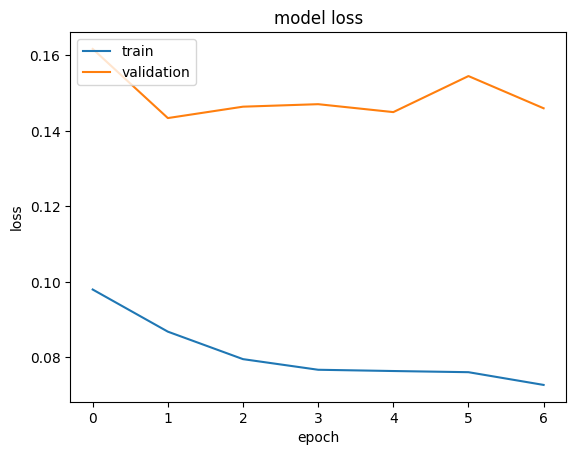

In [ ]:
plt.plot(history_inc.history['loss'])
plt.plot(history_inc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

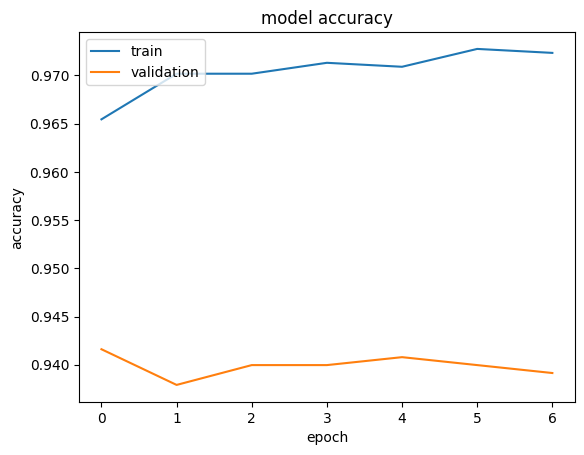

In [ ]:
plt.plot(history_inc.history['accuracy'])
plt.plot(history_inc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_test = validation_generator.classes
validation_generator.reset()
y_pred = model1.predict(validation_generator)

77/77 [==============================] - 12s 83ms/step


In [ ]:
threshold = 0.5
y_pred_binary = [1 if val >= threshold else 0 for val in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1114   88]
 [  63 1174]]


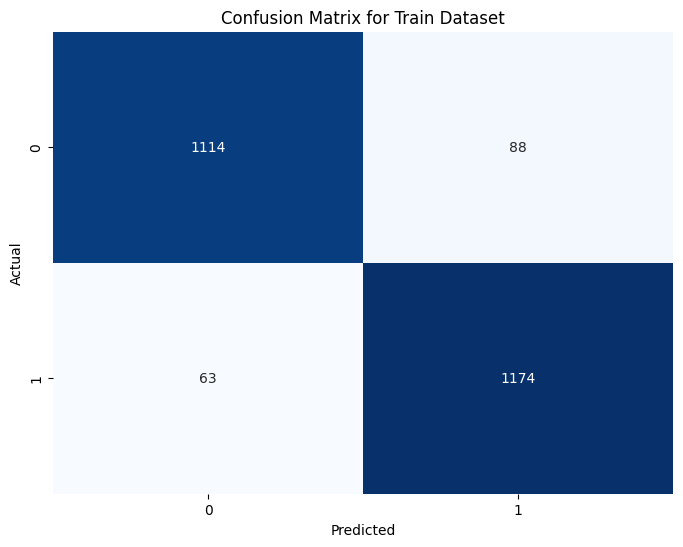

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Train Dataset')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9380893808938089


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_binary)
print(f"F1-Score: {f1}")

F1-Score: 0.9395758303321329


Model is 80 % sure that it is male


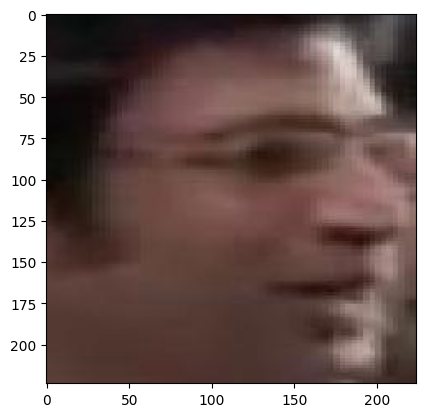

In [ ]:
index = rng.choice(range(len(valid_images)))
img_name = valid_images[index]
prob = int((y_pred * 100).astype(int)[index])
img = plt.imread( img_name)

print('Model is', prob ,'% sure that it is male')
plt.imshow(img)

Model is 0 % sure that it is male


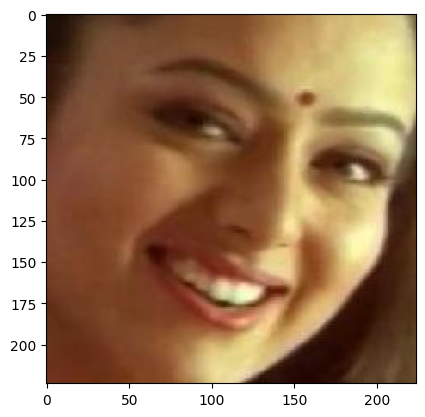

In [ ]:
index = rng.choice(range(len(valid_images)))
img_name = valid_images[index]
prob = int((y_pred * 100).astype(int)[index])
img = plt.imread( img_name)

print('Model is', prob ,'% sure that it is male')
plt.imshow(img)

Model is 99 % sure that it is male


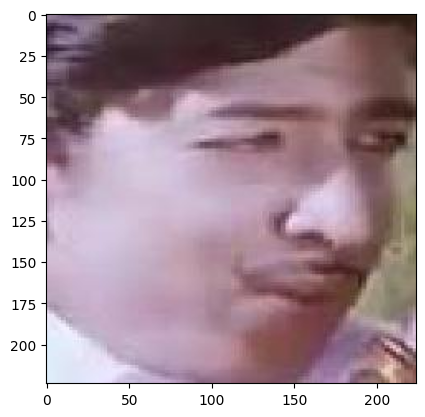

In [ ]:
index = rng.choice(range(len(valid_images)))
img_name = valid_images[index]
prob = int((y_pred * 100).astype(int)[index])
img = plt.imread( img_name)

print('Model is', prob ,'% sure that it is male')
plt.imshow(img)

##SECOND MODEL(RESNET152)

In [ ]:
import tensorflow as tf

In [ ]:
resnet_base = tf.keras.applications.ResNet152(
    include_top=  False,
    weights="imagenet",
    input_shape=(224,224,3)
)

234698864/234698864 [==============================] - 1s 0us/step


In [ ]:
model2 = Sequential()

model2.add(resnet_base)
model2.add(layers.GlobalAveragePooling2D())

model2.add(layers.Dense(64,activation='relu'))
model2.add(layers.Dropout(0.4))

model2.add(layers.Dense(32,activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
resnet_base.trainable = False

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 64)                131136    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                      

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_res = model2.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks = callback
)

Epoch 1/20
304/304 [==============================] - 36s 73ms/step - loss: 0.6989 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.5074
Epoch 2/20
304/304 [==============================] - 19s 62ms/step - loss: 0.6941 - accuracy: 0.5030 - val_loss: 0.6930 - val_accuracy: 0.5074
Epoch 3/20
304/304 [==============================] - 19s 62ms/step - loss: 0.6936 - accuracy: 0.4992 - val_loss: 0.6929 - val_accuracy: 0.5074
Epoch 4/20
304/304 [==============================] - 18s 61ms/step - loss: 0.6933 - accuracy: 0.5069 - val_loss: 0.6932 - val_accuracy: 0.5074
Epoch 5/20
304/304 [==============================] - 19s 63ms/step - loss: 0.6932 - accuracy: 0.5071 - val_loss: 0.6927 - val_accuracy: 0.5604
Epoch 6/20
304/304 [==============================] - 19s 63ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6931 - val_accuracy: 0.5074
Epoch 7/20
304/304 [==============================] - 18s 61ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6930 - val_accuracy:

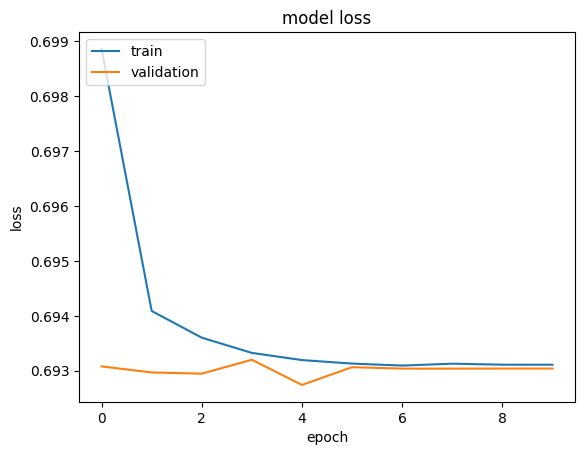

In [ ]:
plt.plot(history_res.history['loss'])
plt.plot(history_res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

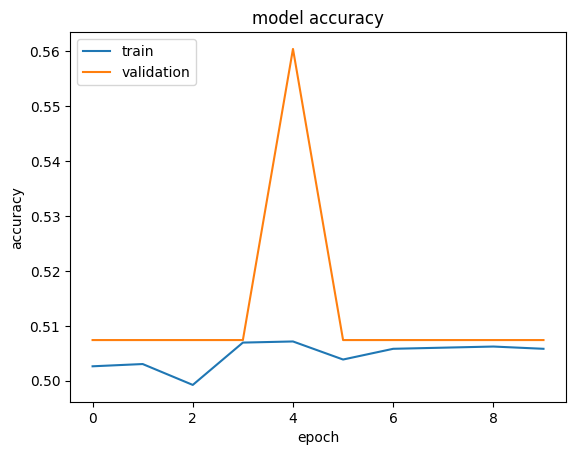

In [ ]:
plt.plot(history_res.history['accuracy'])
plt.plot(history_res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_test = validation_generator.classes
validation_generator.reset()
y_pred = model2.predict(validation_generator)

77/77 [==============================] - 5s 49ms/step


In [ ]:
threshold = 0.5
y_pred_binary = [1 if val >= threshold else 0 for val in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 309  893]
 [ 178 1059]]


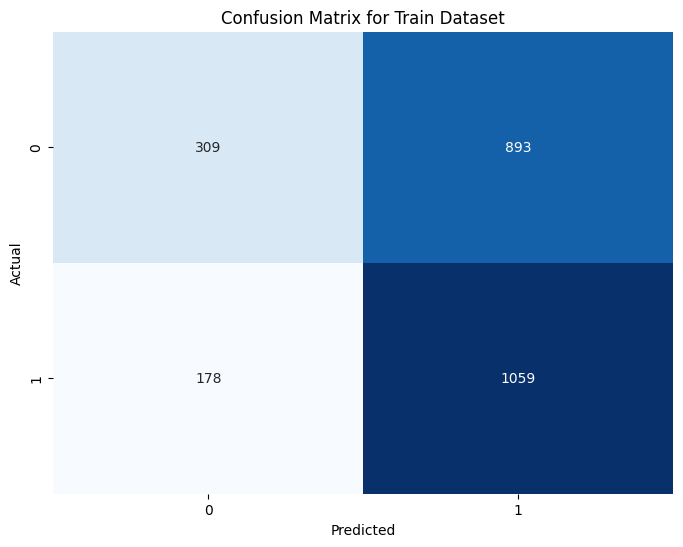

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Train Dataset')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_binary)
print(f"F1-Score: {f1}")

Accuracy: 0.5608856088560885
F1-Score: 0.6641580432737535


Model is 50 % sure that it is male


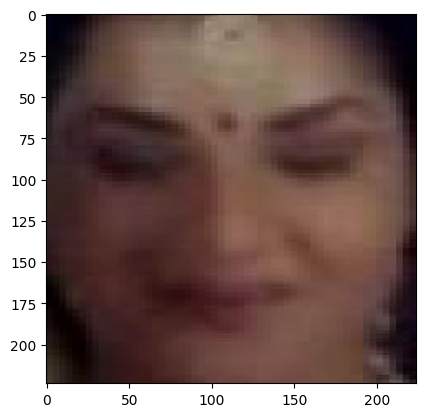

In [ ]:
index = rng.choice(range(len(valid_images)))
img_name = valid_images[index]
prob = int((y_pred * 100).astype(int)[index])
img = plt.imread( img_name)

print('Model is', prob ,'% sure that it is male')
plt.imshow(img)